In [200]:
%reload_ext lab_black
import pandas as pd
import numpy as np
from plotnine import *

In [217]:
# read data
od_pop = pd.read_csv("/Users/samsloate/Desktop/vitalitydf_allcounties.csv")

In [218]:
# remove Alaska from od Data
od_pop = od_pop[od_pop["State"] != "AK"]

od_pop.head(5)

,County Code,Year,Deaths,County,Population,State,death rate,deathcoef,projdeaths,CalculatedDeaths
0,1001,2003.0,NaN,Autauga County,46800,AL,0.000066,3.0,3.0,3.0
1,1001,2004.0,NaN,Autauga County,48366,AL,0.000082,4.0,4.0,4.0
2,1001,2005.0,NaN,Autauga County,49676,AL,0.000086,4.0,4.0,4.0
3,1001,2006.0,NaN,Autauga County,51328,AL,0.000099,5.0,5.0,5.0
4,1001,2007.0,NaN,Autauga County,52405,AL,0.000134,7.0,7.0,7.0


In [220]:
# Calcuate deaths per capita
od_pop["Deaths Per 100,000 People"] = od_pop["CalculatedDeaths"] / od_pop["Population"]
od_pop["Deaths Per 100,000 People"] = od_pop["Deaths Per 100,000 People"] * 100000

# rename colums
od_pop = od_pop.rename(
    columns={
        "County Code": "FIPS",
        "State": "Code",
    }
)

# reorder columns
od_pop = od_pop[
    [
        "FIPS",
        "Code",
        "County",
        "Year",
        "Population",
        "Deaths Per 100,000 People",
        "CalculatedDeaths",
    ]
]

# sort by state, county
od_pop = od_pop.sort_values(["Code", "County", "Year"])

In [221]:
od_pop.sample(25)

,FIPS,Code,County,Year,Population,"Deaths Per 100,000 People",CalculatedDeaths
22034,31135,NE,Perkins County,2015.0,2932,0.000000,0.0
37608,53037,WA,Kittitas County,2015.0,43095,13.922729,6.0
35104,49007,UT,Carbon County,2007.0,20554,19.460932,4.0
25282,37163,NC,Sampson County,2013.0,63898,12.519954,8.0
36755,51181,VA,Surry County,2007.0,7042,14.200511,1.0
34812,48469,TX,Victoria County,2014.0,91042,9.885547,9.0
32523,48117,TX,Deaf Smith County,2013.0,19180,10.427529,2.0
33387,48251,TX,Johnson County,2006.0,142501,7.017495,10.0
12448,20193,KS,Thomas County,2010.0,7930,12.610340,1.0
17255,27081,MN,Lincoln County,2007.0,5949,0.000000,0.0


In [222]:
# merge in state names that were dropped in previous code somewhere

statecodes = pd.read_csv(
    "/Users/samsloate/Desktop/statenames_and_codes.csv", usecols=[0, 2]
)

In [223]:
od_pop = pd.merge(od_pop, statecodes, on="Code", indicator=True)

assert (od_pop._merge == "both").all()

In [224]:
od_pop = od_pop.rename(columns={"Code": "State Abbr"})

In [225]:
# to csv

od_pop = od_pop.drop(columns="_merge")

od_pop.to_csv(
    "/Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/20_intermediate_files/final_drug_od_dataset.csv",
    index=False,
)

In [226]:
# define policy years
FL_policy_year = 2010
TX_policy_year = 2007
WA_policy_year = 2012

# define polic year list
policy_years = [FL_policy_year, TX_policy_year, WA_policy_year]

In [227]:
# define states being looked at

states_needed = ["Florida", "Texas", "Washington"]

/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/Deaths: Florida_pre_post


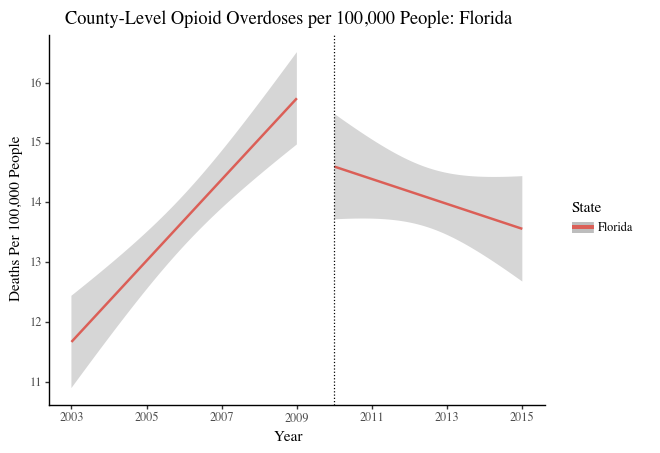

<ggplot: (8777508058305)>


/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/Deaths: Texas_pre_post


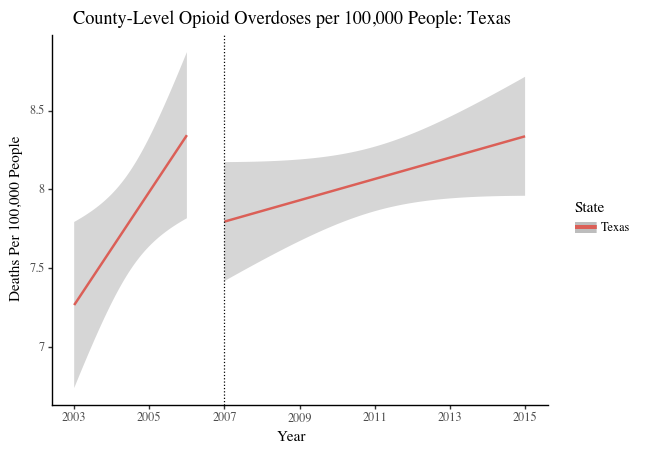

<ggplot: (8777506353973)>


/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/Deaths: Washington_pre_post


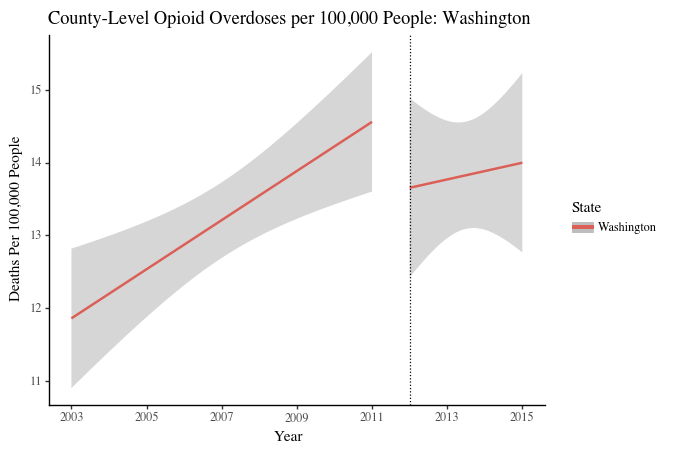

<ggplot: (8777506849337)>


In [228]:
# graph pre-post for FL, TX, WA

for i in range(len(policy_years)):
    p = (
        ggplot()
        + geom_smooth(
            od_pop.loc[
                (od_pop["State"] == states_needed[i])
                & (od_pop["Year"] < policy_years[i])
            ],
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_smooth(
            od_pop.loc[
                (od_pop["State"] == states_needed[i])
                & (od_pop["Year"] >= policy_years[i])
            ],
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_vline(xintercept=policy_years[i], linetype="dotted")
        + xlab("Year")
        + ylab("Deaths Per 100,000 People")
        + theme_classic(base_family="Times")
        + scale_x_continuous(
            breaks=[2003, 2005, 2007, 2009, 2011, 2013, 2015], limits=[2003, 2015]
        )
        + labs(
            title="County-Level Opioid Overdoses per 100,000 People: "
            + states_needed[i]
        )
    )
    ggsave(
        plot=p,
        filename="Deaths: " + states_needed[i] + "_pre_post",
        path="/Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results",
        dpi=100,
    )
    print(p)

/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/FL_DID/Deaths: FL vs. Alabama_pre_post.png
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/FL_DID/Deaths: FL vs. Arkansas_pre_post.png
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: Plotn

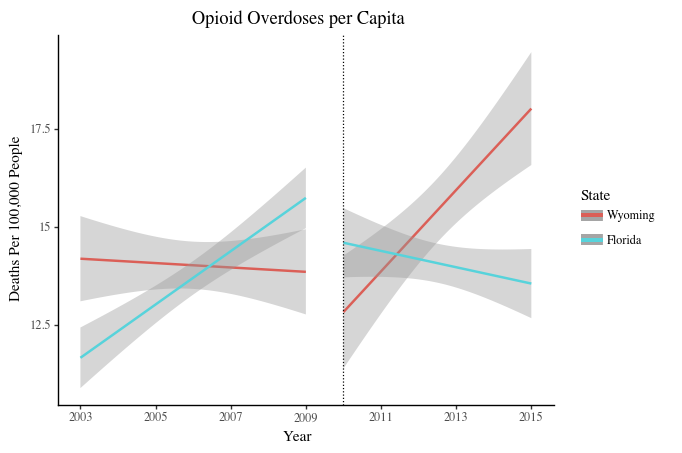

<ggplot: (8777490383237)>


In [236]:
# graph all FL DiDs in a loop to determine which looks the most similar

states = od_pop["State"].unique()

for i in range(len(states)):

    # define dummy variable column for each state at a time
    od_pop["dummy"] = 0

    od_pop.loc[
        (od_pop.State == states[i]),
        "dummy",
    ] = 1

    p = (
        ggplot()
        + geom_smooth(
            od_pop.loc[(od_pop["dummy"] == 1) & (od_pop["Year"] < FL_policy_year)],
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_smooth(
            od_pop.loc[(od_pop["dummy"] == 1) & (od_pop["Year"] >= FL_policy_year)],
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_smooth(
            od_pop.loc[
                (od_pop["State Abbr"] == "FL") & (od_pop["Year"] < FL_policy_year)
            ],
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_smooth(
            od_pop.loc[
                (od_pop["State Abbr"] == "FL") & (od_pop["Year"] >= FL_policy_year)
            ],
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_vline(xintercept=FL_policy_year, linetype="dotted")
        + xlab("Year")
        + ylab("Deaths Per 100,000 People")
        + theme_classic(base_family="Times")
        + scale_x_continuous(
            breaks=[2003, 2005, 2007, 2009, 2011, 2013, 2015], limits=[2003, 2015]
        )
        + labs(title="Opioid Overdoses per Capita")
    )
    ggsave(
        plot=p,
        filename="Deaths: FL vs. " + states[i] + "_pre_post.png",
        path="/Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/FL_DID",
        dpi=100,
    )
print(p)

/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/TX_DID/Deaths: TX vs. Alabama_DID.png
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/TX_DID/Deaths: TX vs. Arkansas_DID.png
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning

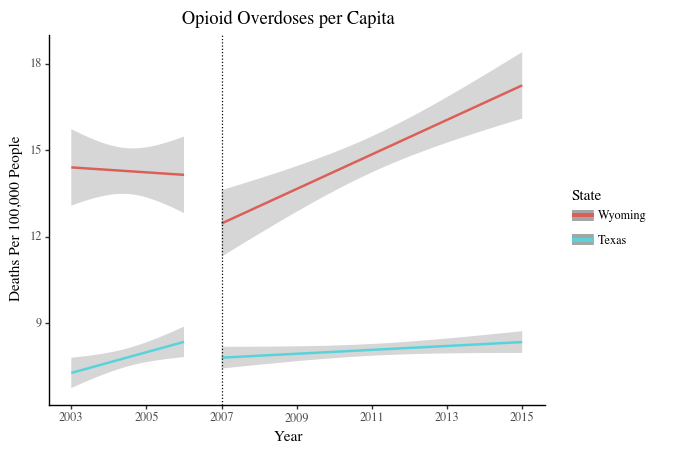

<ggplot: (8777488973617)>


In [237]:
# Markdown: graph all TX DiDs in a loop to determine which looks the most similar

states = od_pop["State"].unique()

for i in range(len(states)):

    # define dummy variable column for each state at a time
    od_pop["dummy"] = 0

    od_pop.loc[
        (od_pop.State == states[i]),
        "dummy",
    ] = 1

    p = (
        ggplot()
        + geom_smooth(
            od_pop.loc[(od_pop["dummy"] == 1) & (od_pop["Year"] < TX_policy_year)],
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_smooth(
            od_pop.loc[(od_pop["dummy"] == 1) & (od_pop["Year"] >= TX_policy_year)],
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_smooth(
            od_pop.loc[
                (od_pop["State Abbr"] == "TX") & (od_pop["Year"] < TX_policy_year)
            ],
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_smooth(
            od_pop.loc[
                (od_pop["State Abbr"] == "TX") & (od_pop["Year"] >= TX_policy_year)
            ],
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_vline(xintercept=TX_policy_year, linetype="dotted")
        + xlab("Year")
        + ylab("Deaths Per 100,000 People")
        + theme_classic(base_family="Times")
        + scale_x_continuous(
            breaks=[2003, 2005, 2007, 2009, 2011, 2013, 2015], limits=[2003, 2015]
        )
        + labs(title="Opioid Overdoses per Capita")
    )
    ggsave(
        plot=p,
        filename="Deaths: TX vs. " + states[i] + "_DID.png",
        path="/Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/TX_DID",
        dpi=100,
    )
print(p)

/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/WA_DID/Deaths: WA vs. Alabama_DID.png
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/WA_DID/Deaths: WA vs. Arkansas_DID.png
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning

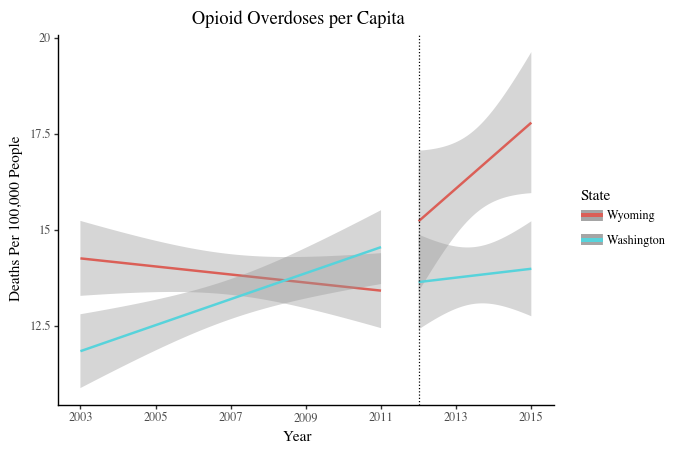

<ggplot: (8777478720977)>


In [249]:
# graph all WA DiDs in a loop to determine which looks the most similar

states = od_pop["State"].unique()

for i in range(len(states)):

    # define dummy variable column for each state at a time
    od_pop["dummy"] = 0

    od_pop.loc[
        (od_pop.State == states[i]),
        "dummy",
    ] = 1

    p = (
        ggplot()
        + geom_smooth(
            od_pop.loc[(od_pop["dummy"] == 1) & (od_pop["Year"] < WA_policy_year)],
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_smooth(
            od_pop.loc[(od_pop["dummy"] == 1) & (od_pop["Year"] >= WA_policy_year)],
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_smooth(
            od_pop.loc[
                (od_pop["State Abbr"] == "WA") & (od_pop["Year"] < WA_policy_year)
            ],
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_smooth(
            od_pop.loc[
                (od_pop["State Abbr"] == "WA") & (od_pop["Year"] >= WA_policy_year)
            ],
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_vline(xintercept=WA_policy_year, linetype="dotted")
        + xlab("Year")
        + ylab("Deaths Per 100,000 People")
        + theme_classic(base_family="Times")
        + scale_x_continuous(
            breaks=[2003, 2005, 2007, 2009, 2011, 2013, 2015], limits=[2003, 2015]
        )
        + labs(title="Opioid Overdoses per Capita")
    )
    ggsave(
        plot=p,
        filename="Deaths: WA vs. " + states[i] + "_DID.png",
        path="/Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/WA_DID",
        dpi=100,
    )
print(p)

## Our chosen states for deaths comparison are:

 
• Florida: Alabama, Georgia, Mississippi, South Carolina, and Tennessee  
• Texas: Arizona, Kentucky, Louisiana, Missouri, and New Mexico  
• Washington: California, Idaho, Montana, Oregon, and Wyoming  


In [242]:
# define chosen states

FL_chosen_states = [
    "Alabama",
    "Georgia",
    "Mississippi",
    "South Carolina",
    "Tennessee",
]
TX_chosen_states = [
    "Arizona",
    "Kentucky",
    "Louisiana",
    "Missouri",
    "New Mexico",
]
WA_chosen_states = [
    "California",
    "Idaho",
    "Montana",
    "Wyoming",
    "Oregon",
]

In [243]:
# define dummy variable column and state label column for FL states
od_pop["dummy"] = 0
od_pop["labels"] = 0

FL_label = ", ".join(map(str, FL_chosen_states))

# run loop with a 1 in "dummy" column if that state is one of the chosen FL comparison states
for j in range(len(od_pop)):
    for i in range(len(FL_chosen_states)):
        if od_pop.State[j] == FL_chosen_states[i]:
            od_pop.at[j, "dummy"] = 1
            label = ", ".join(FL_chosen_states)
            od_pop.loc[od_pop.dummy == 1, "labels"] = label

/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/Deaths: FL_DID_aggregates_averages


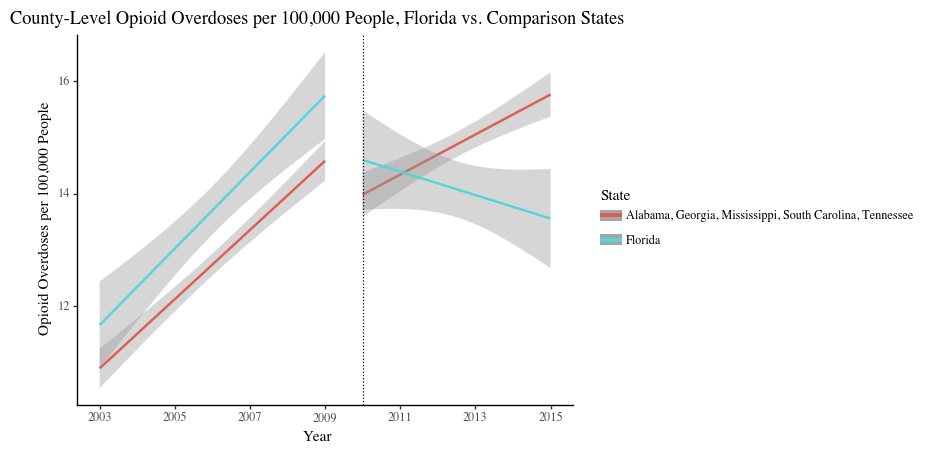

<ggplot: (8777493471461)>


In [244]:
# graph FL DiD with chosen states

p = (
    ggplot()
    # plot all chosen states,  pre 2010
    + geom_smooth(
        od_pop.loc[(od_pop["dummy"] == 1) & (od_pop["Year"] < FL_policy_year)],
        aes(x="Year", y="Deaths Per 100,000 People", color="labels"),
        method="lm",
    )
    # plot all chosen states, post 2010
    + geom_smooth(
        od_pop.loc[(od_pop["dummy"] == 1) & (od_pop["Year"] >= FL_policy_year)],
        aes(x="Year", y="Deaths Per 100,000 People", color="labels"),
        method="lm",
    )
    # plot Florida, pre 2010
    + geom_smooth(
        od_pop.loc[(od_pop["State Abbr"] == "FL") & (od_pop["Year"] < FL_policy_year)],
        aes(x="Year", y="Deaths Per 100,000 People", color="State"),
        method="lm",
    )
    # plot Florida, post 2010
    + geom_smooth(
        od_pop.loc[(od_pop["State Abbr"] == "FL") & (od_pop["Year"] >= FL_policy_year)],
        aes(x="Year", y="Deaths Per 100,000 People", color="State"),
        method="lm",
    )
    + geom_vline(xintercept=FL_policy_year, linetype="dotted")
    + xlab("Year")
    + ylab("Opioid Overdoses per 100,000 People")
    + theme_classic(base_family="Times")
    + scale_x_continuous(
        breaks=[2003, 2005, 2007, 2009, 2011, 2013, 2015], limits=[2003, 2015]
    )
    + labs(
        title="County-Level Opioid Overdoses per 100,000 People, Florida vs. Comparison States",
        color="State",
    )
)
ggsave(
    plot=p,
    filename="Deaths: FL_DID_aggregates_averages",
    path="/Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/",
)
print(p)

In [245]:
# define dummy variable column and state label column for TX states
od_pop["dummy"] = 0
od_pop["labels"] = 0
TX_label = ", ".join(map(str, TX_chosen_states))
for j in range(len(od_pop)):
    for i in range(len(TX_chosen_states)):
        if od_pop.State[j] == TX_chosen_states[i]:
            od_pop.at[j, "dummy"] = 1
            label = ", ".join(TX_chosen_states)
            od_pop.loc[od_pop.dummy == 1, "labels"] = label

/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/Deaths: TX_DID_aggregates_averages


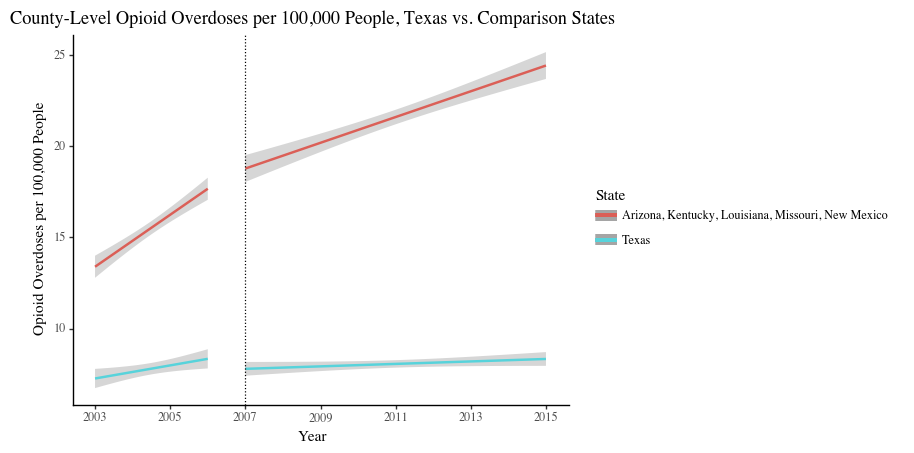

<ggplot: (8777480276473)>


In [246]:
p = (
    ggplot()
    # plot all chosen states,  pre 2010
    + geom_smooth(
        od_pop.loc[(od_pop["dummy"] == 1) & (od_pop["Year"] < TX_policy_year)],
        aes(x="Year", y="Deaths Per 100,000 People", color="labels"),
        method="lm",
    )
    # plot all chosen states, post 2010
    + geom_smooth(
        od_pop.loc[(od_pop["dummy"] == 1) & (od_pop["Year"] >= TX_policy_year)],
        aes(x="Year", y="Deaths Per 100,000 People", color="labels"),
        method="lm",
    )
    # plot Florida, pre 2010
    + geom_smooth(
        od_pop.loc[(od_pop["State Abbr"] == "TX") & (od_pop["Year"] < TX_policy_year)],
        aes(x="Year", y="Deaths Per 100,000 People", color="State"),
        method="lm",
    )
    # plot Florida, post 2010
    + geom_smooth(
        od_pop.loc[(od_pop["State Abbr"] == "TX") & (od_pop["Year"] >= TX_policy_year)],
        aes(x="Year", y="Deaths Per 100,000 People", color="State"),
        method="lm",
    )
    + geom_vline(xintercept=TX_policy_year, linetype="dotted")
    + xlab("Year")
    + ylab("Opioid Overdoses per 100,000 People")
    + theme_classic(base_family="Times")
    + scale_x_continuous(
        breaks=[2003, 2005, 2007, 2009, 2011, 2013, 2015], limits=[2003, 2015]
    )
    + labs(
        title="County-Level Opioid Overdoses per 100,000 People, Texas vs. Comparison States",
        color="State",
    )
)
ggsave(
    plot=p,
    filename="Deaths: TX_DID_aggregates_averages",
    path="/Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/",
)
print(p)

In [247]:
# define dummy variable column and state label column for WA states
od_pop["dummy"] = 0
od_pop["labels"] = 0
WA_label = ", ".join(map(str, WA_chosen_states))
for j in range(len(od_pop)):
    for i in range(len(WA_chosen_states)):
        if od_pop.State[j] == WA_chosen_states[i]:
            od_pop.at[j, "dummy"] = 1
            label = ", ".join(WA_chosen_states)
            od_pop.loc[od_pop.dummy == 1, "labels"] = label

/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/Deaths: WA_DID_aggregates_averages


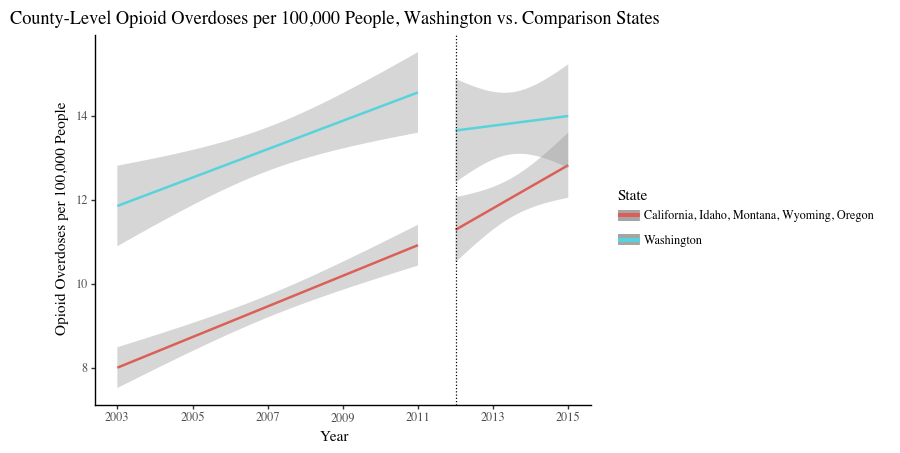

<ggplot: (8777494051473)>


In [248]:
p = (
    ggplot()
    # plot all chosen states,  pre 2010
    + geom_smooth(
        od_pop.loc[(od_pop["dummy"] == 1) & (od_pop["Year"] < WA_policy_year)],
        aes(x="Year", y="Deaths Per 100,000 People", color="labels"),
        method="lm",
    )
    # plot all chosen states, post 2010
    + geom_smooth(
        od_pop.loc[(od_pop["dummy"] == 1) & (od_pop["Year"] >= WA_policy_year)],
        aes(x="Year", y="Deaths Per 100,000 People", color="labels"),
        method="lm",
    )
    # plot Florida, pre 2010
    + geom_smooth(
        od_pop.loc[(od_pop["State Abbr"] == "WA") & (od_pop["Year"] < WA_policy_year)],
        aes(x="Year", y="Deaths Per 100,000 People", color="State"),
        method="lm",
    )
    # plot Florida, post 2010
    + geom_smooth(
        od_pop.loc[(od_pop["State Abbr"] == "WA") & (od_pop["Year"] >= WA_policy_year)],
        aes(x="Year", y="Deaths Per 100,000 People", color="State"),
        method="lm",
    )
    + geom_vline(xintercept=WA_policy_year, linetype="dotted")
    + xlab("Year")
    + ylab("Opioid Overdoses per 100,000 People")
    + theme_classic(base_family="Times")
    + scale_x_continuous(
        breaks=[2003, 2005, 2007, 2009, 2011, 2013, 2015], limits=[2003, 2015]
    )
    + labs(
        title="County-Level Opioid Overdoses per 100,000 People, Washington vs. Comparison States",
        color="State",
    )
)
ggsave(
    plot=p,
    filename="Deaths: WA_DID_aggregates_averages",
    path="/Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/",
)
print(p)